# Midterm 2

## FINM 36700 - 2024

### UChicago Financial Mathematics

* Mark Hendricks
* hendricks@uchicago.edu

# Instructions

## Please note the following:

Points
* The exam is 100 points.
* You have 120 minutes to complete the exam.
* For every minute late you submit the exam, you will lose one point.


Submission
* You will upload your solution to the `Midterm 2` assignment on Canvas, where you downloaded this. 
* Be sure to **submit** on Canvas, not just **save** on Canvas.
* Your submission should be readable, (the graders can understand your answers.)
* Your submission should **include all code used in your analysis in a file format that the code can be executed.** 

Rules
* The exam is open-material, closed-communication.
* You do not need to cite material from the course github repo - you are welcome to use the code posted there without citation.

Advice
* If you find any question to be unclear, state your interpretation and proceed. We will only answer questions of interpretation if there is a typo, error, etc.
* The exam will be graded for partial credit.

## Data

**All data files are found in the class github repo, in the `data` folder.**

This exam makes use of the following data files:
* `midterm_2_data.xlsx`

This file contains the following sheets:
- for Section 2:
    * `sector stocks excess returns` - MONTHLY excess returns for 49 sector stocks
    * `factors excess returns` - MONTHLY excess returns of AQR factor model from Homework 5
- for Section 3:
    * `factors excess returns` - MONTHLY excess returns of AQR factor model from Homework 5

## Scoring

| Problem | Points |
|---------|--------|
| 1       | 25     |
| 2       | 40     |
| 3       | 35     |

### Each numbered question is worth 5 points unless otherwise specified.

# 1. Short Answer

#### No Data Needed

These problems do not require any data file. Rather, analyze them conceptually. 

### 1.1.

Historically, which pricing factor among the ones we studied has shown a considerable decrease in importance?

<span style="color:red">__*Answer 1.1*__</span>
- The size factor has shown a considerable decrease in importance over time. In Homework 6, we saw that, when comparing the models CAPM, FF3, FF5 and AQR, in all of them, the size factor (SMB) presented a small allocation when compared to other factors in the tangency portfolios, which seems like it is not important for pricing. 

### 1.2.

#### True or False: For a given factor model and a set of test assets, the addition of one more factor to that model will surely decrease the cross-sectional MAE. 

<span style="color:red">__*Answer*:__</span> __True__.
- According to what Prof. Mark said in class, "when performing the cross-sectional test, we can see that, by adding more factors, we fit better"
- This is differently from the time-series test, which just tries to fit through the factors and the risk-free rate, so the fit could get worse when adding more factors, because we are just looking for the time-series alphas.
- However, in the cross-sectional test, if we add more and more factors, we am just checking how well the regression with the extra factor fits the assets.
- That is why we saw the MAE in the cross-sectional test decrease from the CAPM to FF3 to FF5 (which incrementally add new factors on top of the previous model) in Homework 5.

#### True or False: For a given factor model and a set of test assets, the addition of one more factor to that model will surely decrease the time-series MAE. 

<span style="color:red">__*Answer*:__</span> __False__.
- As explained above, when we perform a time-series test just tries to fit through the factors and the risk-free rate, so the fit could get worse when adding more factors, because we are just looking for the time-series alphas (there is no reason for the alpha to go towards zero as I add more factors). The error (MAE) could be higher or lower.
- In Homework 5, we saw that the MAE increased from the CAPM to FF3 to FF5. Among all models, the MAE was lower in the CAPM Model, which has only one factor.

Along with stating T/F, explain your reasoning for the two statements.

### 1.3.

Consider the scenario in which you are helping two people with investments.

* The young person has a 50 year investment horizon.
* The elderly person has a 10 year investment horizon.
* Both individuals have the same portfolio holdings.

State who has the more certain cumulative return and explain your reasoning.

<span style="color:red">__*Answer 1.3*__</span>

The elderly person that has a 10 year investment horizon has the more certain cumulative return.
- By the law of large numbers, as the investment horizon gets large, the mean annualized return, $\bar{r}$, converges to the true annual mean return, $\mu$.
- However, here we are talking about cumulative returns. Contrary to the mean annualized return, which has the standard deviation decreasing by $\sqrt{T}$, and, therefore, converging to a more certain value, the cumulative return has the standard deviation increasing as time horizon grows, which makes the cumulative return more uncertain as the investment horizon increases.

### 1.4.

Suppose we find that the 10-year bond yield works well as a new pricing factor, along with `MKT`.

Consider two ways of building this new factor.
1. Directly use the index of 10-year yields, `YLD`
1. Construct a Fama-French style portfolio of equities, `FFYLD`. (Rank all the stocks by their correlation to bond yield changes, and go long the highest ranked and shor tthe lowest ranked.)

Could you test the model with `YLD` and the model with `FFYLD` in the exact same ways? Explain.

<span style="color:red">__*Answer 1.4*__</span>

No, we cannot test the model the same way.
- The **first way** of building the factor makes it like a macro factor, **which is not traded**; if it goes from 0.04 to 0.06, it doesn't mean that its return is 50%. The way of testing this kind of factor is by:
    - 1) runningg a time-series regression for each security on the YLD factor to find the betas (here the time series alpha is meaningless).
    - 2) then **running a cross-sectional regression to estimate the premium $lambda$ for the YLD factor** and the residual pricing errors.
- The **second way** of building the factor makes it as a tradable factor. The way of testing this kind of factor is the **same as we did to test CAPM, FF3, and FF5**:
    - 1) **running a time-series regression** for each security on the FFYLD factor to find the betas and the time-series alphas. Here we can perform a joint test of the time-series **alphas to check if they are zero**.
    - 2) then running a **cross-sectional regression** to **check the $R^2$ and the residuals**.

### 1.5.

Suppose we implement a momentum strategy on cryptocurrencies rather than US stocks.

Conceptually speaking, but specific to the context of our course discussion, how would the risk profile differ from the momentum strategy of US equities?


<span style="color:red">__*Answer 1.5*__</span>

A momentum strategy involving cryptocurrency would have a different risk profile than a similar strategy in US equities based on the following characteristics for the crypto strategy:
- increased volatility,
- increased frequency of extreme events,
- possibly higher transaction costs,
- possibly higher behavioral influences given social trends,
- higher liquidity concerns, as most cryptocurrencies have much lower liquidity than equities, specially in periods of high volatility.

Because of this, a momentum strategy in cryptocurrencies could potentially be more profitable but also riskier and more difficult to implement effectively.

***

# 2. Pricing and Tangency Portfolio

You work in a hedge fund that believes that the AQR 4-Factor Model (present in Homework 5) is the perfect pricing model for stocks.

$$
\mathbb{E} \left[ \tilde{r}^i \right] = \beta^{i,\text{MKT}} \mathbb{E} \left[ \tilde{f}_{\text{MKT}} \right] + \beta^{i,\text{HML}} \mathbb{E} \left[ \tilde{f}_{\text{HML}} \right] + \beta^{i,\text{RMW}} \mathbb{E} \left[ \tilde{f}_{\text{RMW}} \right] + \beta^{i,\text{UMD}} \mathbb{E} \left[ \tilde{f}_{\text{UMD}} \right]
$$

The factors are available in the sheet `factors excess returns`.

The hedge fund invests in sector-tracking ETFs available in the sheet `sectors excess returns`. You are to allocate into these sectors according to a mean-variance optimization with...

* regularization: elements outside the diagonal covariance matrix divided by 2.
* modeled risk premia: expected excess returns given by the factor model rather than just using the historic sample averages.

You are to train the portfolio and test out-of-sample. The timeframes should be:
* Training timeframe: Jan-2018 to Dec-2022.
* Testing timeframe: Jan-2023 to most recent observation.

In [1]:
# Import Libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import datetime
from typing import Union, List, Callable

import warnings
warnings.filterwarnings("ignore")

pd.options.display.float_format = "{:,.4f}".format
pd.set_option('display.width', 200)
pd.set_option('display.max_columns', 30)

import statsmodels.api as sm
from scipy.stats import t

import os
import sys

parent_path = os.path.dirname(os.getcwd()) # Get parent path (if using .ipynb file)
# parent_path = os.path.dirname(os.path.dirname(os.path.abspath(__file__))) # Get parent path (if using .py file)
os.chdir(parent_path) # Set parent path as working directory (for reading and writing files)
sys.path.insert(0, parent_path) # Add parent path to system path (for importing modules)

import utils.portfolio_management_functions as pm

In [2]:
# Check data in the file (sheets, columns, data):
INFILE = "data/midterm_2_data.xlsx"
try:
    pm.read_excel_default(INFILE, print_sheets = True)
except FileNotFoundError as e:
    print(f'{e}.\nCheck file in {parent_path}')

Sheet name: sector excess returns
Columns: date, Agric, Food , Soda , Beer , Smoke, Toys , Fun  , Books, Hshld, Clths, Hlth , MedEq, Drugs, Chems, Rubbr, Txtls, BldMt, Cnstr, Steel, FabPr, Mach , ElcEq, Autos, Aero , Ships, Guns , Gold , Mines, Coal , Oil  , Util , Telcm, PerSv, BusSv, Hardw, Softw, Chips, LabEq, Paper, Boxes, Trans, Whlsl, Rtail, Meals, Banks, Insur, RlEst, Fin  , Other
        date   Agric   Food    Soda    Beer    Smoke   Toys    Fun     Books   Hshld   Clths   Hlth    MedEq   Drugs   Chems  ...   Hardw   Softw   Chips   LabEq   Paper   Boxes   Trans   Whlsl  \
0 1980-01-01 -0.0076  0.0285  0.0084  0.1009 -0.0143  0.1002  0.0362  0.0323  0.0048  0.0059  0.0674 -0.0012 -0.0322  0.0355  ...  0.0588  0.0616  0.0680  0.0924  0.0649  0.0158  0.0875  0.0465   
1 1980-02-01  0.0105 -0.0608 -0.0966 -0.0322 -0.0569 -0.0323 -0.0521 -0.0800 -0.0555 -0.0167 -0.0392 -0.0843 -0.0490 -0.0214  ... -0.0497  0.0214 -0.0286 -0.0541 -0.0053 -0.0079 -0.0541 -0.0346   
2 1980-03-01 -0.22

In [3]:
# Import data from the file:
sector_returns = pd.read_excel(INFILE, sheet_name='sector excess returns',index_col=0)
factors_returns = pd.read_excel(INFILE, sheet_name='factors excess returns',index_col=0)

TRAINING_START = '2018'
TRAINING_END = '2022'
TEST_START = '2023'
TEST_END = '2024'


### 2.1.
(8pts)

Calculate the model-implied expected excess returns of every asset.

The time-series estimations should...
* NOT include an intercept. (You assume the model holds perfectly.)
* use data from the `training` timeframe.

With the time-series estimates, use the `training` timeframe's sample average of the factors as the factor premia. Together, this will give you the model-implied risk premia, which we label as
$$
\lambda_i := \mathbb{E}[\tilde{r}_i]
$$

* Store $\lambda_i$ and $\boldsymbol{\beta}^i$ for each asset.
* Print $\lambda_i$ for `Agric`, `Food`, `Soda`

In [4]:
sector_returns.loc[TRAINING_START:TRAINING_END,:]

,Agric,Food,Soda,Beer,Smoke,Toys,Fun,Books,Hshld,Clths,Hlth,MedEq,Drugs,Chems,Rubbr,...,Hardw,Softw,Chips,LabEq,Paper,Boxes,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin,Other
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-01-01,0.0421,0.0027,0.0564,-0.0023,0.0001,0.0368,0.1817,0.0512,-0.0243,0.0703,0.0804,0.0994,0.0542,0.0159,0.0022,...,0.0927,0.0958,0.0404,0.0824,0.0460,0.0298,0.0241,0.0469,0.1143,0.0240,0.0716,0.0390,0.0360,0.0512,0.0386
2018-02-01,0.0110,-0.0689,-0.0849,-0.0685,-0.0672,0.0056,0.0065,-0.0353,-0.0678,-0.0202,-0.0209,-0.0283,-0.0386,-0.0527,-0.0850,...,0.0473,-0.0154,0.0272,-0.0411,-0.0577,-0.0383,-0.0639,-0.0549,-0.0456,-0.0418,-0.0228,-0.0453,-0.0348,-0.0145,-0.0537
2018-03-01,-0.0506,-0.0239,-0.0052,0.0113,-0.0176,-0.0935,0.0028,-0.0024,0.0176,0.0057,-0.0146,0.0017,-0.0315,-0.0198,0.0157,...,-0.0321,-0.0372,-0.0332,-0.0052,-0.0520,-0.0166,0.0047,-0.0117,-0.0341,-0.0038,-0.0475,-0.0224,0.0442,-0.0141,-0.0360
2018-04-01,0.0784,-0.0358,-0.0093,-0.0448,-0.1431,0.0630,0.0288,-0.0062,-0.0573,0.0315,-0.0005,0.0284,-0.0085,0.0063,0.0015,...,0.0170,0.0142,-0.0314,-0.0275,-0.0750,-0.0152,0.0013,0.0069,0.0398,0.0354,0.0085,0.0337,-0.0130,-0.0169,-0.0137
2018-05-01,0.0181,-0.0097,-0.0141,-0.0137,-0.0201,0.0069,0.0938,0.0059,-0.0049,0.0375,0.0769,0.0560,0.0110,0.0214,-0.0141,...,-0.0147,0.0579,0.1089,0.0305,0.0174,-0.0321,0.0478,0.0142,0.0116,-0.0220,0.0091,-0.0121,-0.0340,0.0021,-0.0014
2018-06-01,-0.0310,0.0598,0.0431,0.0423,0.0293,0.0556,0.0465,0.0221,0.0392,0.0662,0.0146,0.0246,0.0106,0.0022,0.0037,...,0.0053,0.0059,-0.0325,-0.0007,-0.0001,-0.0267,-0.0364,0.0017,0.0402,-0.0305,-0.0107,0.0015,-0.0214,-0.0344,-0.0183
2018-07-01,0.0042,0.0015,0.0573,0.0338,0.0508,0.0422,-0.0719,-0.0478,0.0212,0.0055,0.0735,0.0211,0.0653,0.0469,0.0565,...,-0.0119,0.0220,0.0211,0.0807,0.0637,0.0373,0.0768,0.0222,0.0324,0.0124,0.0422,0.0506,0.0261,0.0224,0.0578
2018-08-01,-0.0401,0.0089,-0.0328,-0.0206,-0.0560,0.0590,0.0213,-0.0478,0.0241,0.0492,0.0557,0.0598,0.0387,-0.0013,0.0036,...,0.1071,0.0483,0.1056,0.0346,-0.0044,-0.0079,0.0275,0.0352,0.0890,0.0350,0.0250,0.0350,-0.0422,0.0003,0.0223
2018-09-01,-0.0613,-0.0238,0.0296,0.0006,0.0523,0.0600,-0.0122,-0.0227,0.0090,0.0096,-0.0044,0.0371,0.0169,-0.0300,0.0173,...,0.0006,-0.0037,-0.0066,0.0095,-0.0109,0.0172,0.0110,-0.0166,0.0036,0.0283,-0.0311,0.0086,-0.0530,-0.0350,0.0013


In [5]:
ts_regression_stats = pm.calc_regression(sector_returns.loc[TRAINING_START:TRAINING_END,:],
                                         factors_returns.loc[TRAINING_START:TRAINING_END,:],
                                          annual_factor=12,
                                          intercept=False,
                                          p_values=False,
                                          rse_mae=False,
                                          r_squared=False,
                                          tracking_error=False)

display(ts_regression_stats.head(3))

,Observed Mean,Observed Std Dev,Beta (MKT),Beta (HML),Beta (RMW),Beta (UMD)
Agric,0.0102,0.0684,0.8324,0.5565,-0.5021,0.0390
Food,0.0046,0.0453,0.5245,0.2055,0.3097,-0.0036
Soda,0.0092,0.0521,0.5402,0.1791,0.6384,0.0137


In [6]:
# Calculate factors risk premia:

betas = ts_regression_stats.filter(regex='Beta')
betas.rename(columns=lambda x: x.replace('Beta (', ''), inplace=True)
betas.rename(columns=lambda x: x.replace(')', ''), inplace=True)

port_annualized_mean_returns = ts_regression_stats['Observed Mean'] * 12

cs_regression_stats = pm.calc_cross_section_regression(
    Y=port_annualized_mean_returns,
    X=betas,
    p_values=False,
)
display(cs_regression_stats)

factor_premia = pd.DataFrame(columns=['Factor Premia'], index=factors_returns.columns)
factors = list(factors_returns.columns)
for factor in factors:
    factor_premia.loc[factor] = cs_regression_stats.loc[f'Lambda ({factor})', :].values[0]


print('\nFactor Risk Premia: ')
display(factor_premia)

,Observed Mean
R-Squared,0.4231
Observed Mean,0.0901
Observed Std Dev,0.0556
MAE,0.0326
RSE,0.0441
Intercept,-0.0389
Lambda (MKT),0.1338
Lambda (HML),0.0221
Lambda (RMW),0.0410
Lambda (UMD),0.1463



Factor Risk Premia: 


,Factor Premia
MKT,0.1338
HML,0.0221
RMW,0.0410
UMD,0.1463


In [7]:
# Calculate monthly expected sector returns:
expected_sector_returns = betas.dot(factor_premia / 12)
expected_sector_returns.columns = ['Expected Mean']
expected_sector_returns.head(3)

,Expected Mean
Agric,0.0091
Food,0.0072
Soda,0.0087


### 2.2.

Use the expected excess returns derived from (2.1) with the **regularized** covariance matrix to calculate the weights of the tangency portfolio.

- Use the covariance matrix only for `training` timeframe.
- Calculate and store the vector of weights for all the assets.
- Return the weights of the tangency portfolio for `Agric`, `Food`, `Soda`.

$$
\textbf{w}_{t} = \dfrac{\tilde{\Sigma}^{-1} \bm{\lambda}}{\bm{1}' \tilde{\Sigma}^{-1} \bm{\lambda}}
$$

Where $\tilde{\Sigma}^{-1}$ is the regularized covariance-matrix.

In [8]:
# Calculate tangency weights
returns = sector_returns.loc[TRAINING_START:TRAINING_END,:]
cov_matrix_factor = 0.5
show_graphic = True
name = 'Tangency'

cov_matrix = returns.cov()
cov_matrix_diag = np.diag(np.diag(cov_matrix))
cov_matrix = cov_matrix_factor * cov_matrix + (1-cov_matrix_factor) * cov_matrix_diag

cov_matrix_inv = np.linalg.pinv(cov_matrix)
ones = np.ones(len(returns.columns))

mu = expected_sector_returns.squeeze()

# Calculate the tangency portfolio weights
scaling = 1 / (ones.T @ cov_matrix_inv @ mu)
tangency_wts = scaling * (cov_matrix_inv @ mu)
tangency_wts = pd.DataFrame(index=returns.columns, data=tangency_wts, columns=[f'{name} Portfolio'])

# Calculate the portfolio returns
#port_returns = returns @ tangency_wts

if cov_matrix_factor != 1:
    tangency_wts = tangency_wts.rename({f'{name} Portfolio': f'{name} Portfolio (Regularized)'},axis=1)
    #port_returns = port_returns.rename({f'{name} Portfolio':f'{name} Portfolio (Regularized)'},axis=1)

tangency_wts.head(3)

,Tangency Portfolio (Regularized)
Agric,0.0222
Food,0.0165
Soda,0.0903


### 2.3.

Evaluate the performance of this allocation in the `testing` period. Report the **annualized**
- mean
- vol
- Sharpe

In [9]:
sector_returns.loc[TEST_START,:].head()

,Agric,Food,Soda,Beer,Smoke,Toys,Fun,Books,Hshld,Clths,Hlth,MedEq,Drugs,Chems,Rubbr,...,Hardw,Softw,Chips,LabEq,Paper,Boxes,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin,Other
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2023-01-01,0.0953,-0.0254,-0.0297,-0.0396,0.0111,0.1613,0.1898,0.1113,-0.0077,0.0868,0.0311,0.0097,-0.0265,0.0883,0.1016,...,0.0531,0.0883,0.1174,0.0277,0.0017,0.0899,0.0959,0.0654,0.1059,0.0941,0.0901,-0.0070,0.1595,0.0811,0.0177
2023-02-01,-0.0371,-0.0157,-0.0301,-0.0013,-0.0372,-0.0413,-0.0457,-0.0497,-0.0309,-0.0636,-0.0371,-0.0323,-0.0520,-0.0487,0.0268,...,-0.0032,-0.0195,0.0271,-0.0533,-0.0538,-0.0435,-0.0024,-0.0068,-0.0588,-0.0288,-0.0305,-0.0392,-0.0262,-0.0252,-0.0268
2023-03-01,-0.0300,0.0309,0.0479,0.0379,-0.0025,-0.0159,0.0268,-0.0416,0.0480,0.0385,-0.0192,0.0438,0.0189,-0.0389,0.0045,...,0.0615,0.1166,0.1111,0.0348,0.0026,-0.0117,-0.0049,0.0025,0.0319,0.0298,-0.1173,-0.0509,-0.0854,-0.0793,0.0205
2023-04-01,-0.0033,0.0258,0.0307,0.0383,0.0375,-0.0342,0.0044,0.0138,0.0401,0.0187,0.0335,0.0702,0.0272,-0.0064,0.0150,...,-0.0721,0.0199,-0.0133,-0.0514,0.0074,-0.0233,-0.0226,0.0010,0.0148,0.0471,0.0139,0.0335,-0.0083,-0.0004,0.0503
2023-05-01,-0.1130,-0.0536,-0.0418,-0.0321,-0.0909,-0.0883,0.0319,-0.0100,-0.0947,-0.1394,-0.0700,-0.0645,-0.0283,-0.0799,-0.0491,...,0.0518,0.0908,0.1020,-0.0314,-0.0914,-0.0646,-0.0096,-0.0163,0.0160,-0.0552,-0.0434,-0.0408,0.0004,-0.0401,-0.0244


In [10]:
# Calculate portfolio returns:
portfolio_test_returns = pm.calc_const_port_returns(returns=sector_returns.loc[TEST_START,:],
                                                   weights=tangency_wts,
                                                   port_name='Tangency Portfolio')
display(portfolio_test_returns)

,Tangency Portfolio
date,
2023-01-01,-0.0150
2023-02-01,-0.0212
2023-03-01,0.0698
2023-04-01,0.0187
2023-05-01,-0.0235
2023-06-01,0.0434
2023-07-01,0.0064
2023-08-01,-0.0290
2023-09-01,-0.0351


In [11]:
# Calculate the factor returns statistics:
perf_metrics = pm.calc_returns_statistics(portfolio_test_returns,
                                    provided_excess_returns=True,
                                    annual_factor=12,
                                    tail_risks=False,
                                    keep_columns=['Annualized Mean', 'Annualized Vol', 'Annualized Sharpe'])
display(perf_metrics)

,Annualized Mean,Annualized Vol,Annualized Sharpe
Tangency Portfolio,0.1065,0.1259,0.8455


### 2.4.

(7pts)

Construct the same tangency portfolio as in `2.2` but with one change:
* replace the risk premia of the assets, (denoted $\lambda_i$) with the sample averages of the excess returns from the `training` set.

So instead of using $\lambda_i$ suggested by the factor model (as in `2.1-2.3`) you're using sample averages for $\lambda_i$.

- Return the weights of the tangency portfolio for `Agric`, `Food`, `Soda`.

Evaluate the performance of this allocation in the `testing` period. Report the **annualized**
- mean
- vol
- Sharpe

In [12]:
tangent_weights_2 = pm.calc_tangency_port(sector_returns.loc[TRAINING_START:TEST_START,:],
                                                 cov_matrix_factor = 0.5,
                                                 annual_factor=12,
                                                 name = 'Tangency')


display(tangent_weights_2.head(3))

,Tangency Portfolio (regularized 0.5)
Agric,0.0311
Food,-0.2675
Soda,0.3136


In [13]:
# Calculate portfolio returns:
portfolio_test_returns_2 = pm.calc_const_portfolio_returns(returns=sector_returns.loc[TEST_START,:],
                                                   weights=tangent_weights_2,
                                                   port_name='Tangency Portfolio')
display(portfolio_test_returns_2)

AttributeError: module 'utils.portfolio_management_functions' has no attribute 'calc_const_portfolio_returns'

In [ ]:
# Calculate the factor returns statistics:
perf_metrics_2 = pm.calc_returns_statistics(portfolio_test_returns_2,
                                    provided_excess_returns=True,
                                    annual_factor=12,
                                    tail_risks=False,
                                    keep_columns=['Annualized Mean', 'Annualized Vol', 'Annualized Sharpe'])
display(perf_metrics_2)

,Annualized Mean,Annualized Vol,Annualized Sharpe
Tangency Portfolio,0.6482,0.1776,3.6502


### 2.5.

Which allocation performed better in the `testing` period: the allocation based on premia from the factor model or from the sample averages?

Why might this be?

In [14]:
comp_perf_metrics = pd.concat([perf_metrics, perf_metrics_2], axis=0)
comp_perf_metrics.index = ['Tangency Portfolio (LPM Mean)', 'Tangency Portfolio (Historical Mean)']
display(comp_perf_metrics)

NameError: name 'perf_metrics_2' is not defined

<span style="color:red">__*Answer 2.5:*__</span>

The allocation from sample averages performed better in the testing period, probably because the factor model is not perfect and the sample averages are more accurate. We can see that from the R-squared of the cross-section test below 50%.

### 2.6.
Suppose you now want to build a tangency portfolio solely from the factors, without using the sector ETFs.

- Calculate the weights of the tangency portfolio using `training` data for the factors.
- Again, regularize the covariance matrix of factor returns by dividing off-diagonal elements by 2.

Report, in the `testing` period, the factor-based tangency stats **annualized**...
- mean
- vol
- Sharpe


,Tangency Factor Portfolio (regularized 0.5)
MKT,0.2804
HML,-0.1124
RMW,0.7381
UMD,0.0940


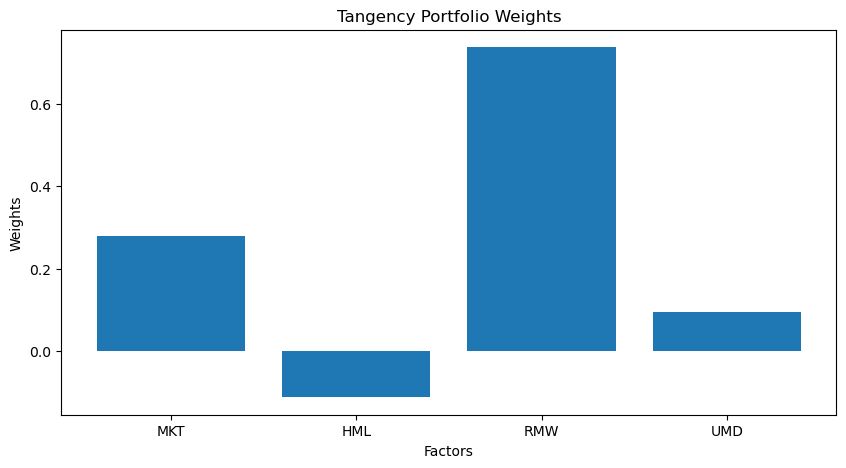

In [15]:
tangent_factor_weights = pm.calc_tangency_port(factors_returns.loc[TRAINING_START:TEST_START,:], 
                                               annual_factor=12, 
                                               cov_matrix_factor=0.5,
                                               name='Tangency Factor')
display(tangent_factor_weights)
plt.figure(figsize=(10, 5))
plt.bar(tangent_factor_weights.index, tangent_factor_weights.iloc[:, 0].values)
plt.xlabel("Factors")
plt.ylabel("Weights")
plt.title("Tangency Portfolio Weights")
plt.show()

In [17]:
# Calculate portfolio returns:
factors_test_returns = pm.calc_portfolio_returns(returns=sector_returns.loc[TEST_START,:],
                                                   weights=tangent_weights_2,
                                                   port_name='Tangency Portfolio')

# Calculate the factor returns statistics:
perf_metrics = pm.calc_returns_statistics(factors_test_returns,
                                    provided_excess_returns=True,
                                    annual_factor=12,
                                    tail_risks=False,
                                    keep_columns=['Annualized Mean', 'Annualized Vol', 'Annualized Sharpe'])
display(perf_metrics)

AttributeError: module 'utils.portfolio_management_functions' has no attribute 'calc_portfolio_returns'

### 2.7.

Based on the hedge fund's beliefs, would you prefer to use the ETF-based tangency or the factor-based tangency portfolio? Explain your reasoning. Note that you should answer based on broad principles and not on the particular estimation results.

I would prefer to use a factor-based tangency, because we can diversify the portfolio better. An ETF-based tangency wouldn't be able to go short on stocks, which might lead to factors having a high correlation with the market factor, and, thus, making the portfolio less diversified, which might lead to lower sharpe ratios

***

# 3. Long-Run Returns

For this question, use only the sheet `factors excess returns`.

Suppose we want to measure the long run returns of various pricing factors.

### 3.1.

Turn the data into log returns.
- Display the first 5 rows of the data.

Using these log returns, report the **annualized**
* mean
* vol
* Sharpe

In [18]:
factor_log_returns = np.log(1 + factors_returns)
print(factor_log_returns.head())

               MKT     HML     RMW     UMD
date                                      
1980-01-01  0.0536  0.0173 -0.0171  0.0728
1980-02-01 -0.0123  0.0061  0.0004  0.0758
1980-03-01 -0.1381 -0.0102  0.0145 -0.1004
1980-04-01  0.0389  0.0105 -0.0212 -0.0043
1980-05-01  0.0513  0.0038  0.0034 -0.0113


In [19]:

sum_stats = pd.DataFrame({'mean': factor_log_returns.mean() * 12,
            'vol': factor_log_returns.std() * np.sqrt(12),
            'sharpe': factor_log_returns.mean() / factor_log_returns.std() * np.sqrt(12)})

sum_stats = sum_stats.applymap(lambda x: f'{x:.2%}' if isinstance(x, float) else x)
sum_stats['sharpe'] = sum_stats['sharpe'].apply(lambda x: f'{float(x.strip("%")) / 100:.2f}')
display(sum_stats)

,mean,vol,sharpe
MKT,7.35%,15.88%,0.46
HML,1.98%,10.98%,0.18
RMW,4.35%,8.36%,0.52
UMD,5.01%,16.04%,0.31


### 3.2.

Consider 15-year cumulative log excess returns. Following the assumptions and modeling of Lecture 6, report the following 15-year stats:
- mean
- vol
- Sharpe

How do they compare to the estimated stats (1-year horizon) in `3.1`? 

In [20]:
horizon_m = 12 * 15
factor_log_returns.iloc[:horizon_m-1,:]

,MKT,HML,RMW,UMD
date,,,,
1980-01-01,0.0536,0.0173,-0.0171,0.0728
1980-02-01,-0.0123,0.0061,0.0004,0.0758
1980-03-01,-0.1381,-0.0102,0.0145,-0.1004
1980-04-01,0.0389,0.0105,-0.0212,-0.0043
1980-05-01,0.0513,0.0038,0.0034,-0.0113
...,...,...,...,...
1994-07-01,0.0278,0.0058,-0.0065,0.0018
1994-08-01,0.0393,-0.0254,0.0095,0.0154
1994-09-01,-0.0234,-0.0191,0.0052,0.0130


In [22]:
horizon_m = 12 * 15 # 15 years
sum_stats_acum = pd.DataFrame({'mean': factor_log_returns.iloc[:horizon_m,:].sum() / 12,
            'vol': factor_log_returns.iloc[:horizon_m,:].std() * np.sqrt(12)})

sum_stats_acum = sum_stats_acum.assign(sharpe = sum_stats_acum['mean'] / sum_stats_acum['vol'])

sum_stats_acum = sum_stats_acum.applymap(lambda x: f'{x:.2%}' if isinstance(x, float) else x)
sum_stats_acum['sharpe'] = sum_stats_acum['sharpe'].apply(lambda x: f'{float(x.strip("%")) / 100:.2f}')
display(sum_stats_acum)

,mean,vol,sharpe
MKT,7.53%,15.92%,0.47
HML,5.35%,9.22%,0.58
RMW,5.86%,5.03%,1.17
UMD,11.64%,11.61%,1.00


### 3.3.

What is the probability that momentum factor has a negative mean excess return over the next 
* single period?
* 15 years?

UMD (momentum factor) RF (negative mean excess return) in the next 1 year: 37.74%
UMD (momentum factor) underperforming RF (negative mean excess return)  in the next 15 years: 11.33%


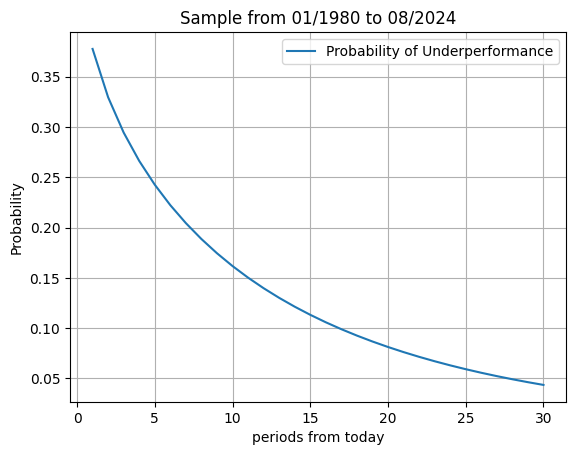

In [ ]:
from scipy.stats import norm
def prob_shortfall(mu_return, sigma_return, h):
    threshold_h = 0 - h*mu_return
    sigma_h = np.sqrt(h) * sigma_return
    return norm.cdf(threshold_h/sigma_h)

mom_mu_excess = factor_log_returns.loc[:,'UMD'].mean() * 12
mom_sigma_excess = factor_log_returns.loc[:,'UMD'].std() * np.sqrt(12)


print(f'UMD (momentum factor) RF (negative mean excess return) in the next 1 year: {prob_shortfall(mu_return=mom_mu_excess, sigma_return=mom_sigma_excess, h=1):,.2%}')

print(f'UMD (momentum factor) underperforming RF (negative mean excess return)  in the next 15 years: {prob_shortfall(mu_return=mom_mu_excess, sigma_return=mom_sigma_excess, h=15):,.2%}')

h = np.arange(30) + 1
probs = pd.DataFrame([prob_shortfall(mom_mu_excess, mom_sigma_excess, x) for x in h], columns=['Probability of Underperformance'], index = h)
probs.plot(title = 'Sample from 01/1980 to 08/2024', ylabel = 'Probability', xlabel = 'periods from today', grid=True)
plt.show()

### 3.4.

Recall from the case that momentum has been underperforming since 2009. 

Using data from 2009 to present, what is the probability that momentum *outperforms* the market factor over the next
* period?
* 15 years?

UMD (momentum factor) RF (negative mean excess return) in the next 1 year: 56.63%
UMD (momentum factor) underperforming RF (negative mean excess return)  in the next 15 years: 74.09%


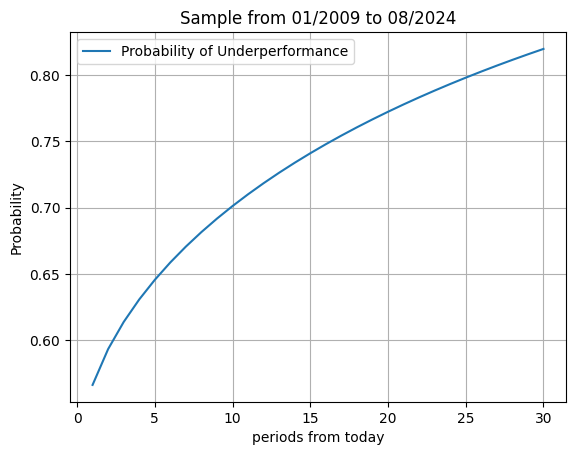

In [ ]:
mom_mu_excess_2 = factor_log_returns.loc['2009':,'UMD'].mean() * 12
mom_sigma_excess_2 = factor_log_returns.loc['2009':,'UMD'].std() * np.sqrt(12)


print(f'UMD (momentum factor) RF (negative mean excess return) in the next 1 year: {prob_shortfall(mu_return=mom_mu_excess_2, sigma_return=mom_sigma_excess_2, h=1):,.2%}')

print(f'UMD (momentum factor) underperforming RF (negative mean excess return)  in the next 15 years: {prob_shortfall(mu_return=mom_mu_excess_2, sigma_return=mom_sigma_excess_2, h=15):,.2%}')

h = np.arange(30) + 1
probs = pd.DataFrame([prob_shortfall(mom_mu_excess_2, mom_sigma_excess_2, x) for x in h], columns=['Probability of Underperformance'], index = h)
probs.plot(title = 'Sample from 01/2009 to 08/2024', ylabel = 'Probability', xlabel = 'periods from today', grid=True)
plt.show()

### 3.5.
Conceptually, why is there such a discrepancy between this probability for 1 period vs. 15 years?

What assumption about the log-returns are we making when we use this technique to estimate underperformance?

No. Since the expected annual excess return is negative, the longer the time horizon, the less likely it will be for the excess annual return to actually be positive.

We are assuming the log-returns are i.i.d and follow a normal distribution, which leads the mean to scale proportionally with the time horizon and the standard deviation to scale with the square root of the time horizon.

### 3.6.

Using your previous answers, explain what is meant by time diversification.

Time diversification is the idea that, over long horizons, the mean annualized return stabilizes as its variance declines. It follows the idea of the law of large numbers, which states that the more independent and identically distributed random variables we have, the more the sample average converges to the true mean. This means that, over long horizons, the mean annualized return converges to the true mean return, which makes the annual mean returns less risky (more confident they will be closer to the true population value).

We could see that in the previous answers as the probability of having positive excess returns increased when the expected value of annual mean return was positive, and decreasing when it was negative.

### 3.7.

Is the probability that `HML` and `UMD` both have negative cumulative returns over the next year higher or lower than the probability that `HML` and `MKT` both have negative cumulative returns over the next year?

Answer conceptually, but specifically. (No need to calculate the specific probabilities.)

The probability of both HML and UMD having negative cumulative return is higher than the probability of both HML and MKT having negative cumulative return. This is because MKT has a higher expected return than UMD, which makes it more likely to have a positive return in the next year.

***